In [13]:
# Import necessary libraries
import pandas as pd  # Pandas for data manipulation
import seaborn as sns  # Seaborn for statistical data visualization
import matplotlib.pyplot as plt  # Matplotlib for creating visualizations
import matplotlib.dates as mdates  # Matplotlib's dates module for handling dates
from datetime import datetime  # Datetime module for datetime operations
from scipy import stats  # Scipy for statistical computations
import numpy as np  # NumPy for numerical computations
from sklearn.metrics import mean_squared_error, r2_score  # Scikit-learn's metrics for regression
import numpy as np  # NumPy for numerical computations
from sklearn.preprocessing import StandardScaler  # Scikit-learn's StandardScaler
from sklearn.cluster import KMeans  # Scikit-learn's KMeans clustering
from sklearn.preprocessing import StandardScaler  # Scikit-learn's StandardScaler
from pandas.plotting import parallel_coordinates  # Pandas' parallel_coordinates for plotting
from sklearn.decomposition import PCA  # Scikit-learn's PCA
from sklearn.metrics import silhouette_score  # Scikit-learn's silhouette_score
import pandas as pd  # Pandas for data manipulation
import seaborn as sns  # Seaborn for statistical data visualization
from sklearn.model_selection import train_test_split  # Scikit-learn's train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Scikit-learn's StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Scikit-learn's metrics for regression




In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
energy_data = pd.read_csv('/content/drive/MyDrive/PROCESSED-Energy-Dataset-192-FINAL (1).csv')
# Load the weather dataset
weather_data=pd.read_csv('/content/drive/MyDrive/Hourly-Weather-Data-Final.csv') # Read weather dataset into a Pandas DataFrame


In [16]:
energy_data.head(10)

,Smart Meter Id,Flats Category,Address,Street,Building Name,Building Code,Periods,Seasons,Date,TotaldailyenergyConsumption,...,2.00 PM,3.00 PM,4.00 PM,5.00 PM,6.00 PM,7.00 PM,8.00 PM,9.00 PM,10.00 PM,11.00 PM
0,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Holiday,summer,1/01/2022,9.32,...,1.39,0.12,0.12,1.03,0.12,0.13,0.14,0.14,0.14,0.63
1,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,2/01/2022,9.19,...,0.75,0.92,0.12,0.12,0.12,1.04,0.14,0.14,0.14,0.14
2,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,3/01/2022,9.57,...,0.12,2.01,0.55,0.12,0.13,0.14,0.14,0.14,1.03,0.14
3,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,4/01/2022,8.63,...,0.12,0.29,1.25,0.12,1.03,0.14,0.14,0.14,0.14,0.14
4,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Holiday,summer,5/01/2022,9.58,...,1.01,1.08,0.57,0.12,0.14,0.14,0.14,1.04,0.14,0.14
5,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,6/01/2022,8.88,...,0.12,0.12,1.61,1.06,0.12,0.13,0.14,0.14,0.14,0.26
6,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,7/01/2022,9.52,...,0.12,0.12,0.12,1.52,0.12,0.79,0.44,0.14,0.14,0.14
7,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,8/01/2022,9.76,...,0.12,0.12,1.06,0.12,1.11,0.56,0.14,0.14,0.14,1.07
8,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,9/01/2022,8.72,...,0.12,0.12,0.12,0.12,0.51,0.77,1.44,0.14,0.14,0.14
9,0000002341DE24A,Residential College,"Connection 1, 72 Heriot Row, Dunedin, Otago, 9016",Heriot Row,Carrington College - Dawson House,J131,Term Time,summer,10/01/2022,9.70,...,0.12,1.06,0.12,0.12,0.12,0.13,0.14,1.56,1.07,0.14


In [17]:
# Preprocessing the energy dataset
energy_data['Date'] = pd.to_datetime(energy_data['Date'], dayfirst=True)

# Assuming the 'DATE(dd/mm/yy)' and 'TIME' columns in the weather dataset are named as such
# and replacing '.' with ':' in the 'TIME' column to correct the format
weather_data['TIME'] = weather_data['TIME'].str.replace('.', ':', regex=False)
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'], dayfirst=True)

# Assuming the time format is like '1:00 PM' or '01:00 AM'
time_format = '%d/%m/%Y %I:%M %p'  # Use '%H:%M' if your time is in 24-hour format

# Then parse the datetime with the explicit format
weather_data['Datetime'] = pd.to_datetime(weather_data['DATE(dd/mm/yy)'] + ' ' + weather_data['TIME'].str.replace('.', ':', regex=False), format=time_format)


# Merge the datasets on the datetime columns
# This assumes that the weather_data has already been aggregated to daily data to match the energy_data frequency
merged_data = pd.merge(energy_data, weather_data, left_on='Date', right_on='Datetime', how='left')


Confusion Matrix:
[[10162  2769]
 [ 4061  8871]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     12931
           1       0.76      0.69      0.72     12932

    accuracy                           0.74     25863
   macro avg       0.74      0.74      0.74     25863
weighted avg       0.74      0.74      0.74     25863


Additional Metrics:
Accuracy: 0.74
Precision: 0.76
Recall: 0.69
F1 Score: 0.72
RMSE of probabilities: 0.42


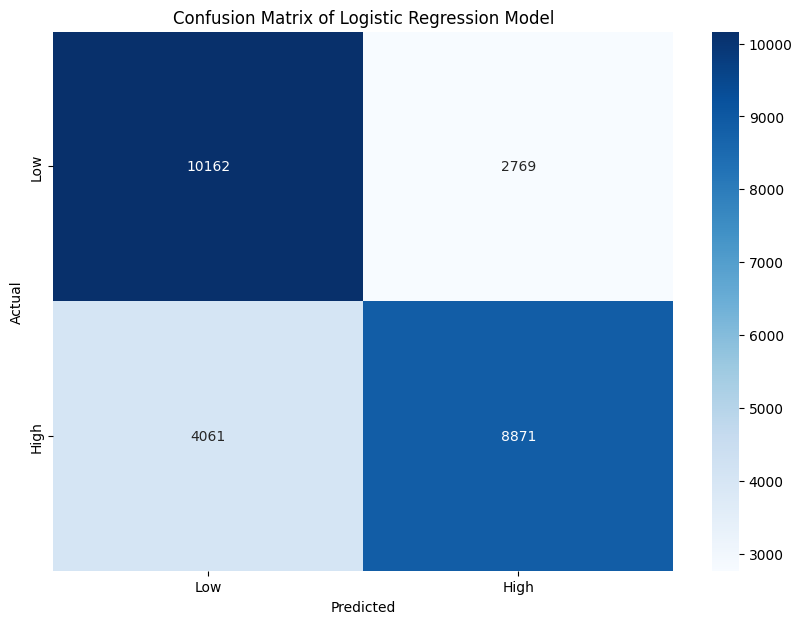

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'TotaldailyenergyConsumption' to a binary variable based on the median
median_energy = merged_data['TotaldailyenergyConsumption'].median()
merged_data['HighEnergyConsumption'] = np.where(merged_data['TotaldailyenergyConsumption'] >= median_energy, 1, 0)

# Selecting the weather variables as predictors
predictors = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Preparing the data for logistic regression
X = merged_data[predictors].fillna(merged_data[predictors].mean())  # Handling missing values by replacing them with mean
y = merged_data['HighEnergyConsumption']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predictions for classes
y_pred = logreg.predict(X_test)

# Predicting probabilities for RMSE calculation
y_pred_proba = logreg.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred_proba))

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE of probabilities: {rmse:.2f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()


DecisionTree

Confusion Matrix:
[[10290  2641]
 [ 2137 10795]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81     12931
           1       0.80      0.83      0.82     12932

    accuracy                           0.82     25863
   macro avg       0.82      0.82      0.82     25863
weighted avg       0.82      0.82      0.82     25863


Additional Metrics:
Accuracy: 0.82
Precision: 0.80
Recall: 0.83
F1 Score: 0.82
RMSE of probabilities: 0.36


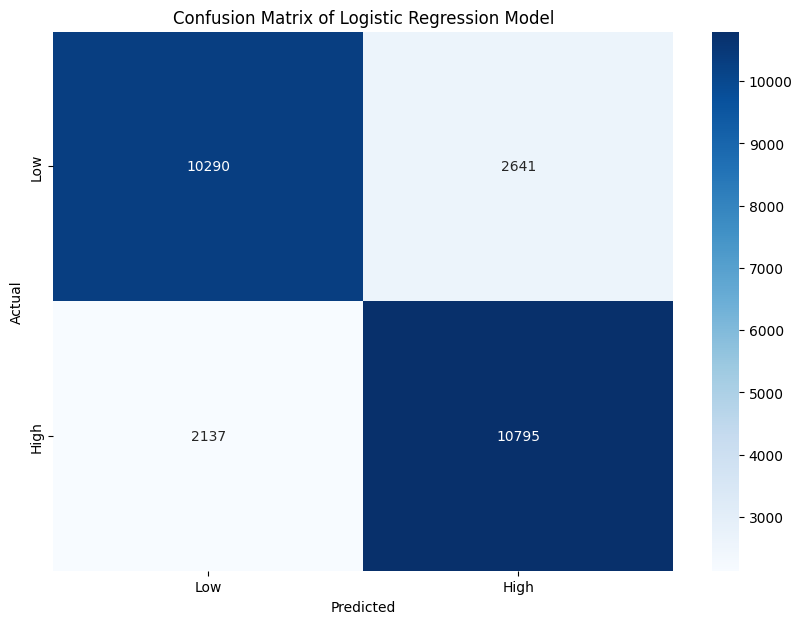

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'TotaldailyenergyConsumption' to a binary variable based on the median
median_energy = merged_data['TotaldailyenergyConsumption'].median()
merged_data['HighEnergyConsumption'] = np.where(merged_data['TotaldailyenergyConsumption'] >= median_energy, 1, 0)

# Selecting the weather variables as predictors
predictors = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Preparing the data for logistic regression
X = merged_data[predictors].fillna(merged_data[predictors].mean())  # Handling missing values by replacing them with mean
y = merged_data['HighEnergyConsumption']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

y_pred_proba = classifier.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred_proba))

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE of probabilities: {rmse:.2f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()


Random Forest

Confusion Matrix:
[[10226  2705]
 [ 2088 10844]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81     12931
           1       0.80      0.84      0.82     12932

    accuracy                           0.81     25863
   macro avg       0.82      0.81      0.81     25863
weighted avg       0.82      0.81      0.81     25863


Additional Metrics:
Accuracy: 0.81
Precision: 0.80
Recall: 0.84
F1 Score: 0.82
RMSE of probabilities: 0.36


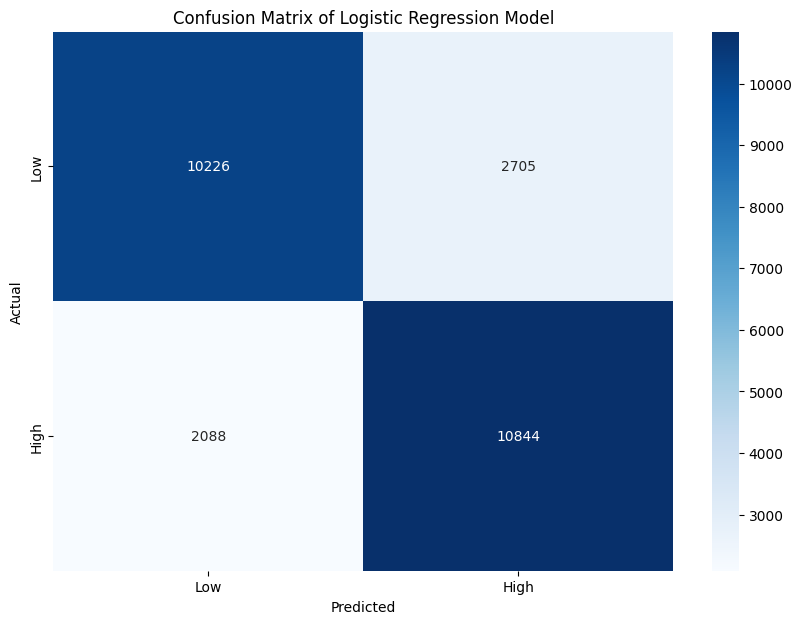

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'TotaldailyenergyConsumption' to a binary variable based on the median
median_energy = merged_data['TotaldailyenergyConsumption'].median()
merged_data['HighEnergyConsumption'] = np.where(merged_data['TotaldailyenergyConsumption'] >= median_energy, 1, 0)

# Selecting the weather variables as predictors
predictors = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Preparing the data for logistic regression
X = merged_data[predictors].fillna(merged_data[predictors].mean())  # Handling missing values by replacing them with mean
y = merged_data['HighEnergyConsumption']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier_random= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier_random.fit(X_train, y_train)

y_pred= classifier_random.predict(X_test)

y_pred_proba = classifier_random.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred_proba))

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE of probabilities: {rmse:.2f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()


SVM

Confusion Matrix:
[[9726 3205]
 [3457 9475]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74     12931
           1       0.75      0.73      0.74     12932

    accuracy                           0.74     25863
   macro avg       0.74      0.74      0.74     25863
weighted avg       0.74      0.74      0.74     25863


Additional Metrics:
Accuracy: 0.74
Precision: 0.75
Recall: 0.73
F1 Score: 0.74
RMSE of probabilities: 0.51


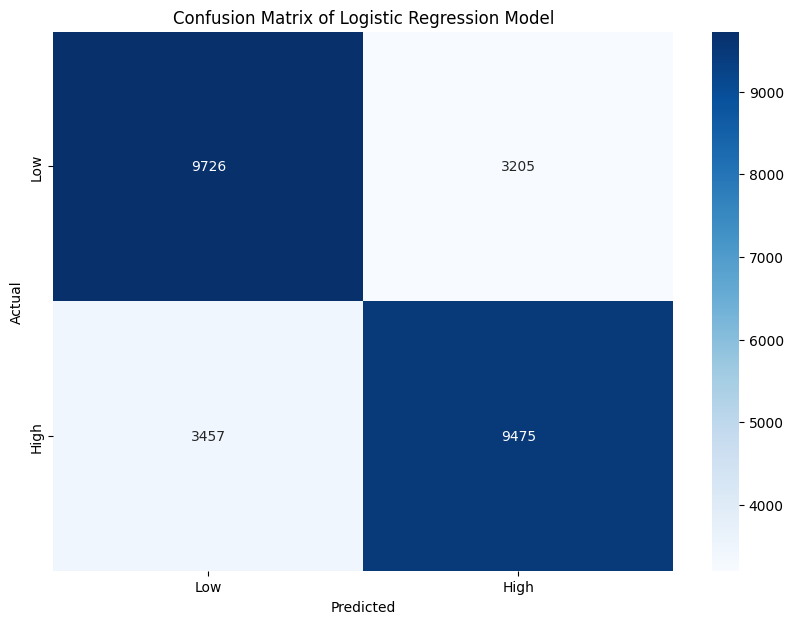

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'TotaldailyenergyConsumption' to a binary variable based on the median
median_energy = merged_data['TotaldailyenergyConsumption'].median()
merged_data['HighEnergyConsumption'] = np.where(merged_data['TotaldailyenergyConsumption'] >= median_energy, 1, 0)

# Selecting the weather variables as predictors
predictors = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Preparing the data for logistic regression
X = merged_data[predictors].fillna(merged_data[predictors].mean())  # Handling missing values by replacing them with mean
y = merged_data['HighEnergyConsumption']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier_SVC = SVC(kernel='linear', random_state=0)
classifier_SVC.fit(X_train, y_train)

y_pred= classifier_SVC.predict(X_test)

#y_pred_proba = classifier_SVC.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE of probabilities: {rmse:.2f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()


Confusion Matrix:
[[10454  2477]
 [ 2743 10189]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80     12931
           1       0.80      0.79      0.80     12932

    accuracy                           0.80     25863
   macro avg       0.80      0.80      0.80     25863
weighted avg       0.80      0.80      0.80     25863


Additional Metrics:
Accuracy: 0.80
Precision: 0.80
Recall: 0.79
F1 Score: 0.80
RMSE of probabilities: 0.45


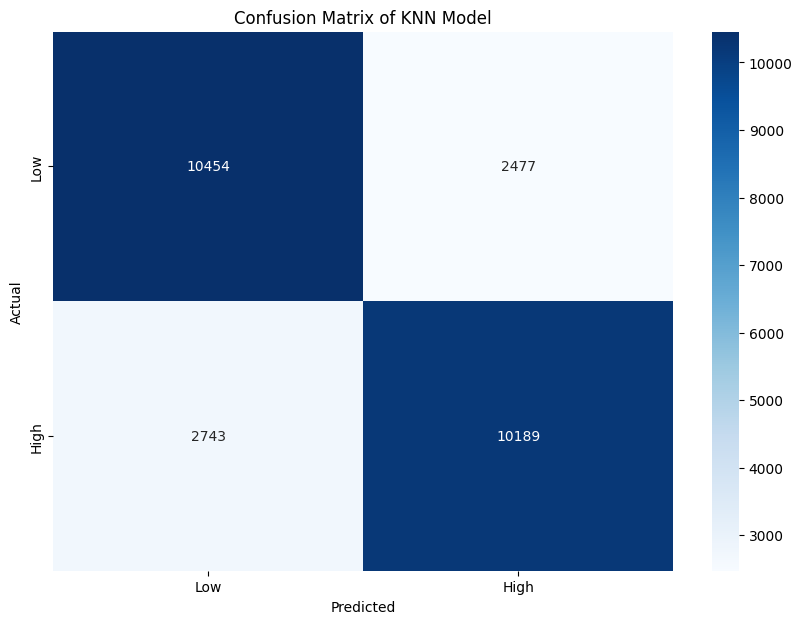

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'TotaldailyenergyConsumption' to a binary variable based on the median
median_energy = merged_data['TotaldailyenergyConsumption'].median()
merged_data['HighEnergyConsumption'] = np.where(merged_data['TotaldailyenergyConsumption'] >= median_energy, 1, 0)

# Selecting the weather variables as predictors
predictors = ['TEMP(oC)', 'RH(%)', 'WINDSPD(m/s)', 'WINDIR(degrees)', 'GLOBAL(W/m2)', 'UVA(W/m2)', 'UVB(W/m2)', 'VISIBLE(micromol/m2s)', 'RAIN(mm)', 'PRESS(hPa)', 'MAXGUST(m/s)']

# Preparing the data for logistic regression
X = merged_data[predictors].fillna(merged_data[predictors].mean())  # Handling missing values by replacing them with mean
y = merged_data['HighEnergyConsumption']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier_KNN= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier_KNN.fit(X_train, y_train)

y_pred= classifier_KNN.predict(X_test)

#y_pred_proba = classifier_SVC.predict_proba(X_test)[:, 1]  # Get probabilities of the positive class

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Output the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"RMSE of probabilities: {rmse:.2f}")

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of KNN Model')
plt.show()


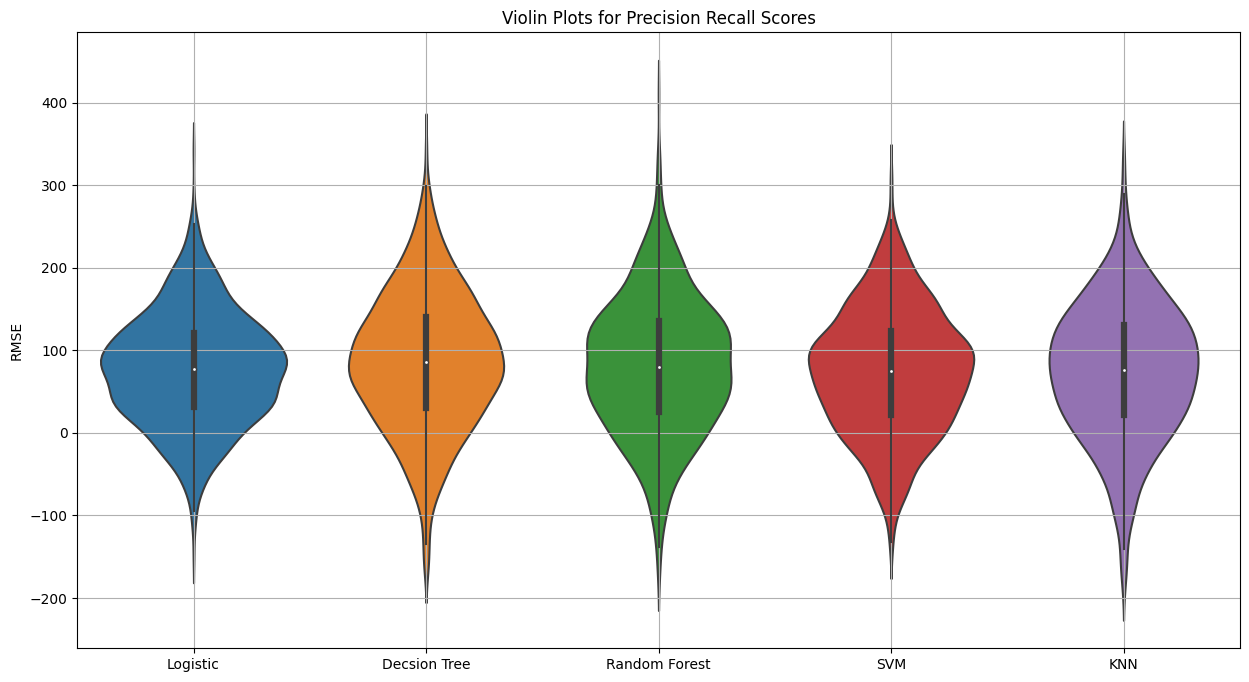

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Results for Random Forest and Ridge Regressor
Logistic = {'Precision': 76, 'Recall': 69}
DecisionTree = {'Precision': 80, 'Recall': 83}
RandomForest ={'Precision': 80, 'Recall': 84}
SVC = {'Precision': 75, 'Recall': 73}
KNN ={'Precision': 78, 'Recall': 83}

# Assuming normal distribution for RMSE scores
np.random.seed(42)

Logistic = np.random.normal(Logistic['Precision'], Logistic['Recall'], 1000)
DecisionTree = np.random.normal(DecisionTree['Precision'], DecisionTree['Recall'], 1000)
RandomForest = np.random.normal(RandomForest['Precision'], RandomForest['Recall'], 1000)
SVC = np.random.normal(SVC['Precision'], SVC['Recall'], 1000)
KNN = np.random.normal(KNN['Precision'], KNN['Recall'], 1000)

# Create DataFrame for plotting
data_to_plot = {
    'Logistic': Logistic,
    'Decsion Tree': DecisionTree,
    'Random Forest': RandomForest,
    'SVM': SVC,
    'KNN': KNN
}
df = pd.DataFrame(data_to_plot)

# Plotting violin plot
plt.figure(figsize=(15, 8))
sns.violinplot(data=df)
plt.title('Violin Plots for Precision Recall Scores')
plt.ylabel('RMSE')
# Adding gridlines
plt.grid(True)

# Show the plot
plt.show()


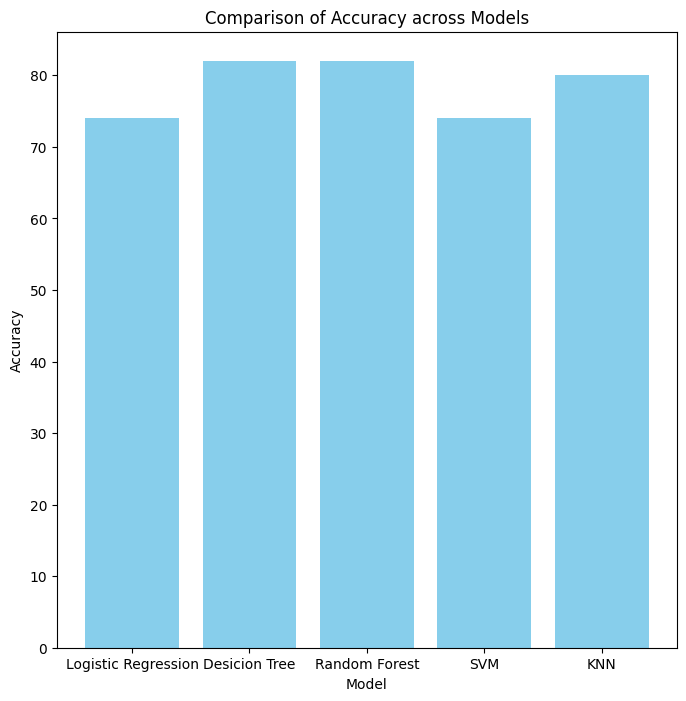

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
models = ['Logistic Regression', 'Desicion Tree', 'Random Forest', 'SVM', 'KNN']
accuracy = [74, 82, 82, 74, 80]

# Create a DataFrame
data = {'Model': models, 'Accuracy': accuracy}
df = pd.DataFrame(data)

# Plotting a bar plot
plt.figure(figsize=(8, 8))
plt.bar(df['Model'], df['Accuracy'], color='skyblue')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy across Models')

# Show the plot
plt.show()
